# Module 2: Deep Learning with PyTorch
Learning Objective: Understand the mathematics behind neural networks and implement basic neural networks using the PyTorch framework.

In [ ]:
!pip install torch torchvision torchaudio numpy

In [ ]:
# Importing the necessary libraries
import torch  # PyTorch library for tensor operations and deep learning
import numpy as np  # NumPy library for numerical operations

# This grid is a list of lists, where each sublist represents a row in the grid.
# Row 1: [2, 4] - The first row of the grid with two elements, 2 and 4.
# Row 2: [5, 1] - The second row with elements 5 and 1.
# Row 3: [2, 5] - The third row with elements 2 and 5.
simple_grid = [[2, 4], [5, 1], [2, 5]]

# Converting the simple 2D grid list to a PyTorch Tensor
# Tensors are a specialized data structure that are very similar to arrays and matrices.
simple_grid_tensor = torch.tensor(simple_grid)

# Visualizing the data structure before it is converted into a tensor.
print(f"Simple Grid: \n {simple_grid} \n")

# Tensor representation of the grid
print(f"Simple Grid as Tensor: \n {simple_grid_tensor} \n")


Simple Grid: 
 [[2, 4], [5, 1], [2, 5]] 

Simple Grid as Tensor: 
 tensor([[2, 4],
        [5, 1],
        [2, 5]]) 



In [ ]:
# Printing attributes of the 'simple_grid_tensor' to understand its characteristics.

# Shape of the tensor:
# The .shape attribute of a tensor returns the size of each dimension of the tensor.
# For a 2D tensor like 'simple_grid_tensor', this will return a tuple representing its rows and columns.
print(f"Shape of tensor: {simple_grid_tensor.shape}")

# Datatype of the tensor:
# The .dtype attribute indicates the data type of the elements in the tensor.
# Common data types include float32, int32, etc.
print(f"Datatype of tensor: {simple_grid_tensor.dtype}")

# Device where the tensor is stored:
# The .device attribute shows the device on which the tensor is stored.
# This could be the CPU, a GPU, or other types of hardware accelerators.
print(f"Device tensor is stored on: {simple_grid_tensor.device}")

Shape of tensor: torch.Size([3, 2])
Datatype of tensor: torch.int64
Device tensor is stored on: cpu


In [ ]:
# Moving the 'simple_grid_tensor' to a GPU if one is available.

# Check if CUDA (an API by Nvidia for GPU computing) is available.
# torch.cuda.is_available() returns True if PyTorch can access a CUDA-enabled GPU,
if torch.cuda.is_available():
    # If a GPU is available, the tensor is moved to the GPU.
    # The .to("cuda") method transfers the tensor to the GPU's memory.
    # This allows for faster operations on the tensor using the GPU's computing power.
    simple_grid_tensor = simple_grid_tensor.to("cuda")

    # Optional: Print a confirmation message or additional details.
    print(f"Tensor moved to GPU: {simple_grid_tensor.device}")


Tensor moved to GPU: cuda:0


In [ ]:
# Reshaping the tensor
# The view() method returns a new tensor with the same data as the original tensor but of a different shape.
reshaped_tensor = simple_grid_tensor.view(2, 3)
print(f"Reshaped Tensor (2x3):\n{reshaped_tensor}\n")

# Element-wise addition
# Adding a scalar value (e.g., 3) to each element of the tensor.
added_tensor = simple_grid_tensor + 3
print(f"Tensor after adding 3 to each element:\n{added_tensor}\n")

# Element-wise multiplication
# Multiplying each element of the tensor by 2.
multiplied_tensor = simple_grid_tensor * 2
print(f"Tensor after multiplying each element by 2:\n{multiplied_tensor}\n")

# Calculating the sum
# The sum() method calculates the total sum of all elements in the tensor.
total_sum = simple_grid_tensor.sum()
print(f"Total sum of all elements in the tensor: {total_sum}\n")

# Calculating the mean
# The mean() method calculates the average of all elements in the tensor.
# Note: The tensor needs to be of a floating point type to calculate the mean.
mean_value = simple_grid_tensor.float().mean()
print(f"Mean value of all elements in the tensor: {mean_value}\n")


Reshaped Tensor (2x3):
tensor([[2, 4, 5],
        [1, 2, 5]], device='cuda:0')

Tensor after adding 3 to each element:
tensor([[5, 7],
        [8, 4],
        [5, 8]], device='cuda:0')

Tensor after multiplying each element by 2:
tensor([[ 4,  8],
        [10,  2],
        [ 4, 10]], device='cuda:0')

Total sum of all elements in the tensor: 19

Mean value of all elements in the tensor: 3.1666667461395264



In [ ]:
# Let's create a second tensor, identical to 'simple_grid_tensor'
second_grid_tensor = torch.tensor([[2, 4], [5, 1], [2, 5]])
if torch.cuda.is_available():
    # If a GPU is available, the tensor is moved to the GPU.
    # The .to("cuda") method transfers the tensor to the GPU's memory.
    second_grid_tensor = second_grid_tensor.to("cuda")

# Element-wise multiplication of the two tensors
# The '*' operator in PyTorch performs element-wise multiplication when used with tensors.
multiplied_tensor = simple_grid_tensor * second_grid_tensor

# Printing the result of the multiplication
print(f"Result of element-wise multiplication:\n{multiplied_tensor}")


Result of element-wise multiplication:
tensor([[ 4, 16],
        [25,  1],
        [ 4, 25]], device='cuda:0')


## 2.2 Datasets and DataLoaders

In [ ]:
import torch
import torchvision
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

fashion_mnist_training = datasets.FashionMNIST(
    root="data/FashionMNIST",
    train=True,
    download=True,
    transform=ToTensor(),
)

fashion_mnist_test = datasets.FashionMNIST(
    root="data/FashionMNIST",
    train=False,
    download=True,
    transform=ToTensor(),
)

100%|██████████| 26421880/26421880 [00:02<00:00, 10211651.55it/s]


Extracting data/FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 170597.91it/s]


Extracting data/FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3195534.59it/s]


Extracting data/FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 8017926.84it/s]

Extracting data/FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/FashionMNIST/raw



In [ ]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

# FashionMNIST class names
classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
           "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

def imshow(img):
    # Convert the tensor image to numpy for displaying
    img = img.numpy()
    # The images are in Channel x Height x Width format. Convert them to Height x Width x Channel format.
    plt.imshow(np.transpose(img, (1, 2, 0)))
    plt.show()

# Get some random training images
data_loader = torch.utils.data.DataLoader(fashion_mnist_training, batch_size=4, shuffle=True)
images, labels = next(iter(data_loader))

# Show images
imshow(torchvision.utils.make_grid(images))

# Print labels
print('Labels: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))


NameError: name 'fashion_mnist_training' is not defined

In [ ]:
from torch.utils.data import DataLoader, random_split

# Split training set for training and validation
train_size = int(0.8 * len(fashion_mnist_training))
validation_size = len(fashion_mnist_training) - train_size
train_dataset, validation_dataset = random_split(fashion_mnist_training, [train_size, validation_size])

# Define batch size for the data loaders
batch_size = 64  # You can modify this based on your system's capabilities

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
validation_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(fashion_mnist_test, batch_size=batch_size, shuffle=False)

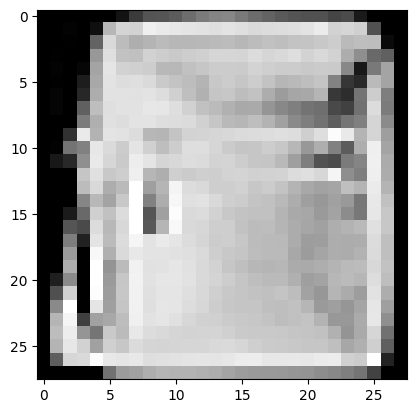

Label: Bag


In [ ]:
# Iterate through the training loader
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Display the first image and its label
imshow(torchvision.utils.make_grid(images[0]))
print('Label:', classes[labels[0]])


## Building the Neural netowrk

In [ ]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
# Assuming CPU usage
device = "cpu"

# Check for CUDA GPU availability
if torch.cuda.is_available():
    device = "cuda"
# If CUDA is not available, check for MPS availability (Apple silicon)
elif torch.backends.mps.is_available():
    device = "mps"

print(f"Using {device} device")

Using cuda device


In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_size, 784),
            nn.ReLU(),
            nn.Linear(784, 784),
            nn.ReLU(),
            nn.Linear(784, num_classes)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [ ]:
from torch import optim

# Initialize the neural network
model_fashion = NeuralNetwork(28*28, 10).to(device)

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_fashion.parameters())

In [ ]:
# Training function
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [ ]:
# Validation function
def validate(dataloader, model, loss_fn):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  model.eval()
  validation_loss, correct = 0, 0
  with torch.no_grad():
      for X, y in dataloader:
          X, y = X.to(device), y.to(device)
          pred = model(X)
          validation_loss += loss_fn(pred, y).item()
          correct += (pred.argmax(1) == y).type(torch.float).sum().item()
  validation_loss /= num_batches
  correct /= size
  print(f"Validation Error: Accuracy: {(100*correct):>0.1f}%, Avg loss: {validation_loss:>8f} \n")


In [ ]:
# Training loop
epochs = 5
for epoch in range(epochs):
    print(f"Epoch {epoch+1}\n-------------------------------")
    train(train_loader, model_fashion, loss_fn, optimizer)
    validate(validation_loader, model_fashion, loss_fn)
print("Training done!")

Epoch 1
-------------------------------
loss: 2.302729  [    0/48000]
loss: 0.590611  [ 6400/48000]
loss: 0.407324  [12800/48000]
loss: 0.337639  [19200/48000]
loss: 0.420281  [25600/48000]
loss: 0.391311  [32000/48000]
loss: 0.463916  [38400/48000]
loss: 0.415630  [44800/48000]
Validation Error: Accuracy: 84.3%, Avg loss: 0.438010 

Epoch 2
-------------------------------
loss: 0.511491  [    0/48000]
loss: 0.549887  [ 6400/48000]
loss: 0.439524  [12800/48000]
loss: 0.405662  [19200/48000]
loss: 0.472584  [25600/48000]
loss: 0.235769  [32000/48000]
loss: 0.578190  [38400/48000]
loss: 0.469415  [44800/48000]
Validation Error: Accuracy: 85.7%, Avg loss: 0.372870 

Epoch 3
-------------------------------
loss: 0.289888  [    0/48000]
loss: 0.460700  [ 6400/48000]
loss: 0.333584  [12800/48000]
loss: 0.206388  [19200/48000]
loss: 0.278447  [25600/48000]
loss: 0.312930  [32000/48000]
loss: 0.319352  [38400/48000]
loss: 0.331666  [44800/48000]
Validation Error: Accuracy: 87.5%, Avg loss: 0.3

In [ ]:
# Test the model
def test(dataloader, model):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

test(test_loader, model_fashion)

Test Error: 
 Accuracy: 87.6%, Avg loss: 0.334666 



## Overfitting

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset

# Data augmentation for CIFAR-10
transform_augment = transforms.Compose([
    # Do not uncomment the section below until the fixing of the overfitting section
    # transforms.RandomHorizontalFlip(),
    # transforms.RandomRotation(10),
    transforms.ToTensor()
])

In [ ]:
# MNIST datasets
mnist_training = datasets.MNIST(
    root="data/MNIST",
    train=True,
    download=True,
    transform=transform_augment
)

mnist_test = datasets.MNIST(
    root="data/MNIST",
    train=False,
    download=True,
    transform=transform_augment  # Using the same transform for test data
)

mnist_training_subset = Subset(mnist_training, range(1000))


100%|██████████| 9912422/9912422 [00:00<00:00, 451796955.59it/s]

Extracting data/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 34413549.38it/s]


Extracting data/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 200495488.97it/s]


Extracting data/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 5881608.14it/s]

Extracting data/MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/MNIST/raw



In [ ]:
batch_size = 64
mnist_train_subset_loader = DataLoader(mnist_training_subset, batch_size=batch_size, shuffle=True)
mnist_train_loader = DataLoader(mnist_training, batch_size=batch_size, shuffle=True)
mnist_test_loader = DataLoader(mnist_test, batch_size=batch_size, shuffle=False)

In [ ]:
model_mnist = NeuralNetwork(28*28, 10).to(device)

In [ ]:
# Loss function and optimizers
loss_fn = nn.CrossEntropyLoss()
optimizer_mnist = optim.Adam(model_mnist.parameters())

In [ ]:
epochs = 40
for epoch in range(epochs):
    print("Training on MNIST:")
    train(mnist_train_subset_loader, model_mnist, loss_fn, optimizer_mnist)
    validate(mnist_test_loader, model_mnist, loss_fn)

print("Training done!")

Training on MNIST:
loss: 2.313363  [    0/ 1000]
Validation Error: Accuracy: 77.5%, Avg loss: 0.755583 

Training on MNIST:
loss: 0.588817  [    0/ 1000]
Validation Error: Accuracy: 82.6%, Avg loss: 0.552951 

Training on MNIST:
loss: 0.238990  [    0/ 1000]
Validation Error: Accuracy: 83.8%, Avg loss: 0.500781 

Training on MNIST:
loss: 0.268809  [    0/ 1000]
Validation Error: Accuracy: 87.0%, Avg loss: 0.439095 

Training on MNIST:
loss: 0.123712  [    0/ 1000]
Validation Error: Accuracy: 88.2%, Avg loss: 0.400351 

Training on MNIST:
loss: 0.134600  [    0/ 1000]
Validation Error: Accuracy: 88.2%, Avg loss: 0.417620 

Training on MNIST:
loss: 0.049804  [    0/ 1000]
Validation Error: Accuracy: 88.1%, Avg loss: 0.427139 

Training on MNIST:
loss: 0.016161  [    0/ 1000]
Validation Error: Accuracy: 88.6%, Avg loss: 0.443274 

Training on MNIST:
loss: 0.020772  [    0/ 1000]
Validation Error: Accuracy: 89.1%, Avg loss: 0.417796 

Training on MNIST:
loss: 0.006623  [    0/ 1000]
Valida

Fixing Overfitting

In [ ]:
class NeuralNetworkBetter(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NeuralNetworkBetter, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_size, 784),
            nn.ReLU(),
            nn.Dropout(0.5),  # Dropout added to mitigate overfitting
            nn.Linear(784, 784),
            nn.ReLU(),
            nn.Linear(784, num_classes)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [ ]:
model_mnist = NeuralNetworkBetter(28*28, 10).to(device)

In [ ]:
# Loss function and optimizers
loss_fn = nn.CrossEntropyLoss()
optimizer_mnist = optim.Adam(model_mnist.parameters())

In [ ]:
for epoch in range(epochs):
    print("Training on MNIST:")
    train(mnist_train_subset_loader, model_mnist, loss_fn, optimizer_mnist)
    validate(mnist_test_loader, model_mnist, loss_fn)

print("Training done!")

Training on MNIST:
loss: 2.310999  [    0/ 1000]
Validation Error: Accuracy: 75.1%, Avg loss: 0.781171 

Training on MNIST:
loss: 0.746662  [    0/ 1000]
Validation Error: Accuracy: 79.9%, Avg loss: 0.594820 

Training on MNIST:
loss: 0.460455  [    0/ 1000]
Validation Error: Accuracy: 84.6%, Avg loss: 0.476654 

Training on MNIST:
loss: 0.195024  [    0/ 1000]
Validation Error: Accuracy: 85.9%, Avg loss: 0.453818 

Training on MNIST:
loss: 0.145397  [    0/ 1000]
Validation Error: Accuracy: 86.8%, Avg loss: 0.415284 

Training on MNIST:
loss: 0.254855  [    0/ 1000]
Validation Error: Accuracy: 87.9%, Avg loss: 0.422630 

Training on MNIST:
loss: 0.261263  [    0/ 1000]
Validation Error: Accuracy: 87.6%, Avg loss: 0.410571 

Training on MNIST:
loss: 0.062649  [    0/ 1000]
Validation Error: Accuracy: 88.8%, Avg loss: 0.396758 

Training on MNIST:
loss: 0.066318  [    0/ 1000]
Validation Error: Accuracy: 89.3%, Avg loss: 0.402935 

Training on MNIST:
loss: 0.033950  [    0/ 1000]
Valida

# Module 3: Solving Computer Vision With Deep Learning and PyTorch
- Learning Objective: Implement advanced computer vision techniques such as convolutional neural networks, object detection, semantic segmentation, and pose estimation using PyTorch.

## Basic Convolutional Neural Networks (CNNs)

In [ ]:
class MyFirstCNN(nn.Module):
    def __init__(self):
        super(MyFirstCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = x.view(-1, 128 * 4 * 4)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

full_trainset = datasets.CIFAR10(
    'data/CIFAR',
    download=True,
    train=True,
    transform=transform)

testset = datasets.CIFAR10(
    'data/CIFAR',
    download=True,
    train=False,
    transform=transform)

# 10% of the data to be used as a validation set
num_train = len(full_trainset)
num_validation = int(0.1 * num_train)
num_train -= num_validation

trainset, validationset = random_split(full_trainset, [num_train, num_validation])

# Define the loaders for training and validation sets
train_loader = DataLoader(trainset, batch_size=64, shuffle=True)
validation_loader = DataLoader(validationset, batch_size=64, shuffle=False)
test_loader = DataLoader(testset, batch_size=64, shuffle=False)

100%|██████████| 170498071/170498071 [00:13<00:00, 12376448.58it/s]


Extracting data/CIFAR/cifar-10-python.tar.gz to data/CIFAR
Files already downloaded and verified


In [ ]:
model_simple_cnn = MyFirstCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer_cnn = optim.Adam(model_simple_cnn.parameters(), lr=0.001)

In [ ]:
epochs = 20
for epoch in range(epochs):
    train(train_loader, model_simple_cnn, criterion, optimizer_cnn)
    validate(validation_loader, model_simple_cnn, criterion)

loss: 2.305271  [    0/45000]
loss: 1.576300  [ 6400/45000]
loss: 1.344872  [12800/45000]
loss: 1.317952  [19200/45000]
loss: 1.217363  [25600/45000]
loss: 1.175412  [32000/45000]
loss: 1.252451  [38400/45000]
loss: 1.195776  [44800/45000]
Validation Error: Accuracy: 61.1%, Avg loss: 1.110068 

loss: 1.129944  [    0/45000]
loss: 0.957610  [ 6400/45000]
loss: 1.045470  [12800/45000]
loss: 1.132576  [19200/45000]
loss: 0.715870  [25600/45000]
loss: 0.818427  [32000/45000]
loss: 0.849877  [38400/45000]
loss: 0.905113  [44800/45000]
Validation Error: Accuracy: 65.7%, Avg loss: 0.946349 

loss: 0.769122  [    0/45000]
loss: 0.803082  [ 6400/45000]
loss: 0.868995  [12800/45000]
loss: 0.699204  [19200/45000]
loss: 0.772073  [25600/45000]
loss: 1.136021  [32000/45000]
loss: 0.619562  [38400/45000]
loss: 0.659824  [44800/45000]
Validation Error: Accuracy: 67.1%, Avg loss: 0.937903 

loss: 0.774969  [    0/45000]
loss: 0.628261  [ 6400/45000]
loss: 0.863045  [12800/45000]
loss: 0.420928  [19200

In [ ]:
test(test_loader, model_simple_cnn)

Test Error: 
 Accuracy: 73.7%, Avg loss: 1.816525 



## Object Detection with YOLO(You Only Look Once)

In [ ]:
import torchvision.transforms as T

# Function to load the YOLO model
def load_yolo_model():
    """
    Loads a pretrained YOLOv5 model from Ultralytics.

    Returns:
        model (torch.nn.Module): The loaded YOLOv5 model.
    """
    # Load a pre-trained YOLOv5 model from the Ultralytics repository
    model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

    # Set the model to evaluation mode to disable dropout layers and batch normalization updates
    model.eval()

    return model

# Function to run object detection
def detect_objects(model, image_path):
    """
    Performs object detection on an image using the specified model.

    Args:
        model (torch.nn.Module): The YOLOv5 model to use for detection.
        image_path (str): Path to the image file on which detection is to be performed.

    Returns:
        results: The detection results containing bounding boxes, confidences, and class IDs.
    """
    # Run the model on the input image and get the detection results
    results = model(image_path)

    return results

# Function to display results
def display_results(results):
    """
    Displays the detection results on the image and prints them.

    Args:
        results: The detection results from the YOLOv5 model.
    """
    # Print textual results summary (e.g., detected classes and counts)
    results.print()

    # Show the image with bounding boxes drawn around detected objects
    results.show()

    # For further processing or analysis, we can access the raw results
    # Here, results.xyxy[0] contains bounding boxes in xyxy format for the first image
    # results.pandas().xyxy[0] converts the results to a pandas DataFrame for easy manipulation

    # Example: Access the results as a pandas DataFrame
    df = results.pandas().xyxy[0]
    print(df)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-2-20 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1: 1080x1920 6 persons, 3 cups, 1 chair, 1 dining table, 3 laptops
Speed: 112.7ms pre-process, 120.8ms inference, 638.8ms NMS per image at shape (1, 3, 384, 640)


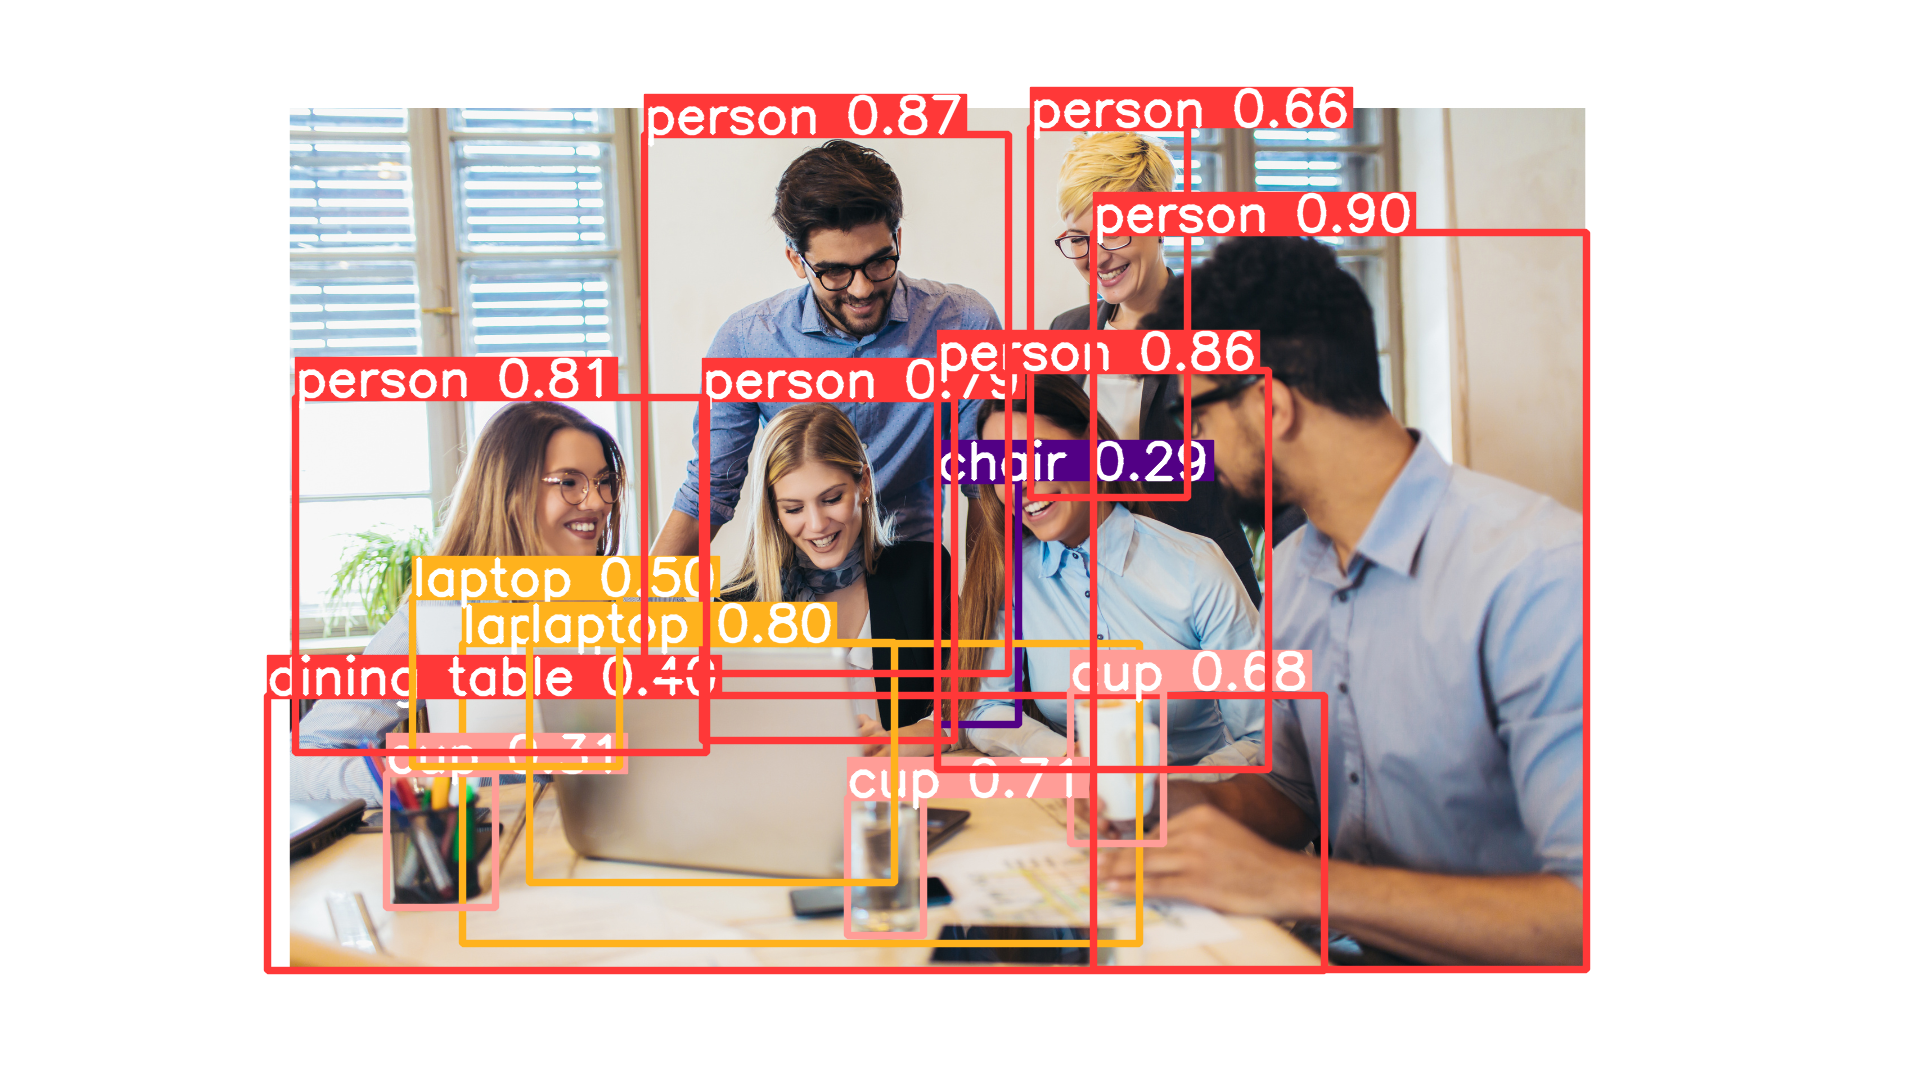

           xmin        ymin         xmax        ymax  confidence  class  \
0   1093.824951  232.443573  1586.386963  969.408875    0.903895      0   
1    644.536865  134.255081  1008.076660  673.388550    0.869750      0   
2    937.531494  370.653809  1268.686157  769.360229    0.855410      0   
3    295.084930  397.824738   706.038208  752.577209    0.812504      0   
4    529.878662  642.586548   894.740662  882.165527    0.797224     63   
5    702.666809  398.614746   954.485718  740.988281    0.787597      0   
6    847.143433  797.796509   923.508301  935.021973    0.710154     41   
7   1070.889160  690.502197  1163.150879  843.001221    0.676423     41   
8   1030.019775  127.430847  1187.299194  497.486267    0.657000      0   
9    412.883240  596.755737   619.602356  766.463379    0.502471     63   
10   267.322937  695.911194  1324.560303  970.329346    0.400252     60   
11   386.440186  773.324585   495.387512  907.502319    0.305516     41   
12   462.542236  643.2405

In [ ]:
    # Load the YOLO model
    model = load_yolo_model()

    # Specify the path to the image
    image_path = "test.png"

    # Detect objects in the image
    results = detect_objects(model, image_path)

    # Display the results
    display_results(results)

## Semantic Segmenation With DeepLab

In [ ]:
from torchvision.models.segmentation import deeplabv3_resnet101
from PIL import Image
%matplotlib inline

# Function to load the pre-trained DeepLabV3 model
def load_deeplabv3_model(pretrained=True, num_classes=21):
    """
    Loads a pre-trained DeepLabV3 model with a ResNet-101 backbone.

    Args:
        pretrained (bool): If True, returns a model pre-trained on COCO train2017.
        num_classes (int): Number of classes for the model output.

    Returns:
        model (torch.nn.Module): The loaded DeepLabV3 model.
    """
    # Load the pre-trained DeepLabV3 model
    model = deeplabv3_resnet101(pretrained=pretrained)
    # Update the number of classes based on the dataset
    model.eval()  # Set the model to evaluation mode
    return model

# Function to perform semantic segmentation on an image
def segment_image(image_path, model):
    """
    Performs semantic segmentation on the given image using the specified model.

    Args:
        image_path (str): Path to the image file.
        model (torch.nn.Module): The semantic segmentation model to use.

    Returns:
        output (torch.Tensor): The semantic segmentation output of the model.
    """
    # Load the image
    image = Image.open(image_path).convert("RGB")
    # Define the standard transformation
    transform = T.Compose([
        T.Resize(256),
        T.CenterCrop(224),
        T.ToTensor(),
        T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    input_tensor = transform(image).unsqueeze(0)

    # Perform inference
    with torch.no_grad():
        output = model(input_tensor)['out'][0]
    return output

# Function to display the segmentation results
def display_segmentation(image_path, output):
    """
    Displays the original image alongside its semantic segmentation map.

    Args:
        image_path (str): Path to the original image file.
        output (torch.Tensor): The semantic segmentation output of the model.
    """
    # Load the original image
    image = Image.open(image_path)
    # Convert the model output to a 2D array
    output_predictions = output.argmax(0)
    # Display the original image and the segmentation map
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Original Image')
    plt.subplot(1, 2, 2)
    plt.imshow(output_predictions.numpy())
    plt.title('Segmentation Map')
    plt.colorbar()
    plt.show()


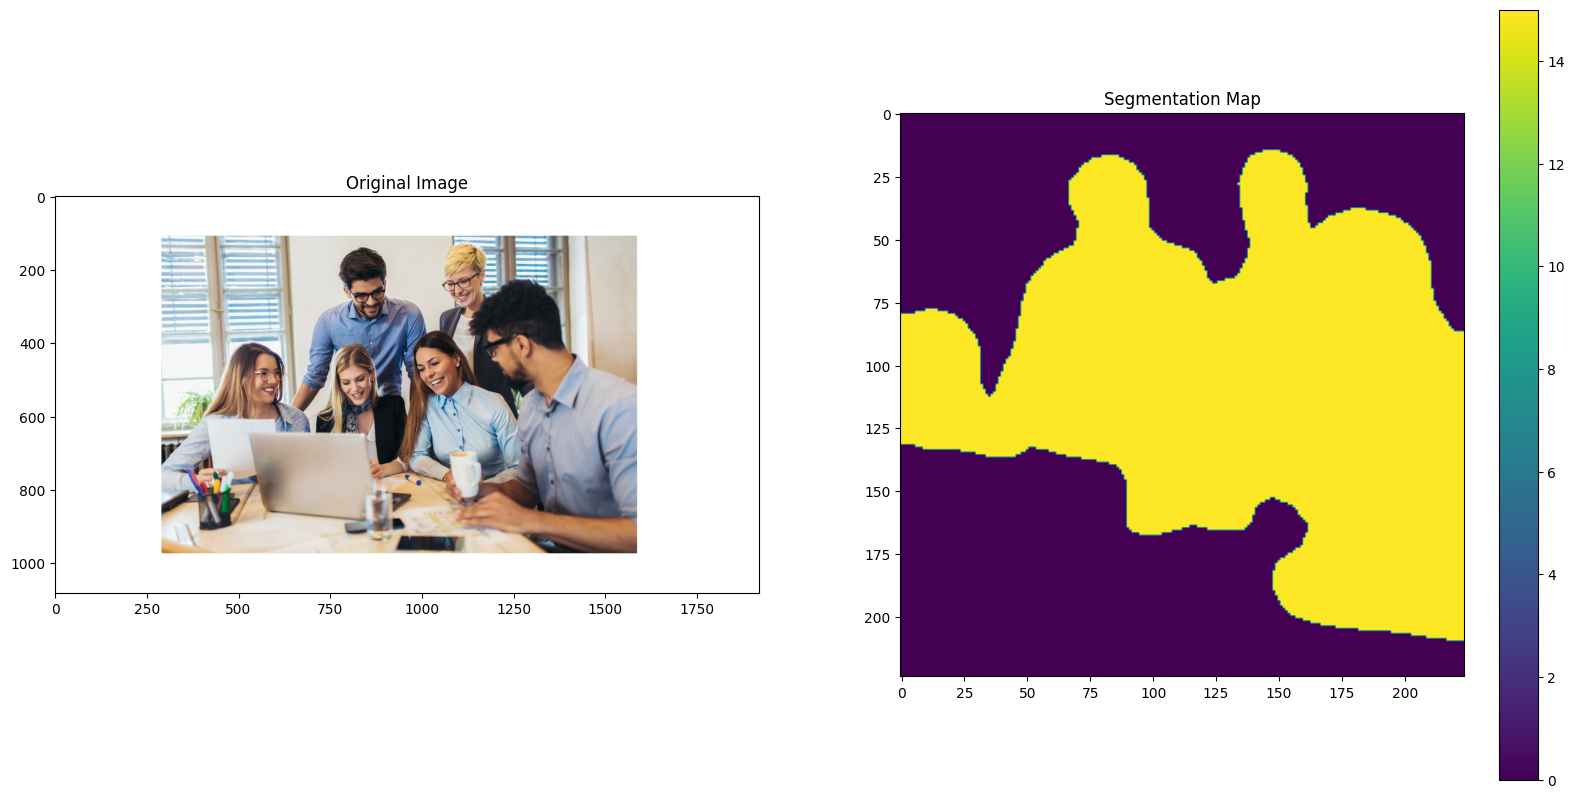

In [ ]:
    # Load the model
    model = load_deeplabv3_model(pretrained=True)
    # Specify the path to your image
    image_path = 'test.png'
    # Perform semantic segmentation
    output = segment_image(image_path, model)
    # Display the segmentation results
    display_segmentation(image_path, output)

## Pose Estimation With Keypoint RCNN

In [ ]:
from torchvision.models.detection import keypointrcnn_resnet50_fpn, KeypointRCNN_ResNet50_FPN_Weights

# Function to load the pre-trained Keypoint R-CNN model
def load_pose_model():
    """
    Loads a pre-trained Keypoint R-CNN model.

    Returns:
        model (torch.nn.Module): The loaded Keypoint R-CNN model.
    """
    # Load a model pre-trained on COCO keypoints
    weights = KeypointRCNN_ResNet50_FPN_Weights.DEFAULT

    model = keypointrcnn_resnet50_fpn(weights=weights)
    model.eval()
    return model

# Function to perform pose estimation on an image
def estimate_pose(image_path, model):
    """
    Performs pose estimation on the given image using the specified model.

    Args:
        image_path (str): Path to the image file.
        model (torch.nn.Module): The pose estimation model to use.

    Returns:
        keypoints (list): The estimated keypoints for each detected human figure.
    """
    # Load the image
    image = Image.open(image_path).convert("RGB")
    image_tensor = T.functional.to_tensor(image).unsqueeze(0)

    # Perform inference
    with torch.no_grad():
        prediction = model(image_tensor)

    # The predictions are a list of dicts with 'keypoints' and 'keypoints_scores'
    keypoints = prediction[0]['keypoints']
    keypoints_scores = prediction[0]['keypoints_scores']

    return keypoints, keypoints_scores

# Function to display the pose estimation results
def display_pose_estimation(image_path, keypoints, keypoints_scores, threshold=2.0):
    """
    Displays the original image with pose estimations drawn.

    Args:
        image_path (str): Path to the original image file.
        keypoints (list): The estimated keypoints for each detected human figure.
        keypoints_scores (list): The scores for the estimated keypoints.
        threshold (float): The score threshold to consider for displaying keypoints.
    """
    # Load and show the original image
    image = Image.open(image_path)
    plt.figure(figsize=(12, 12))
    plt.imshow(image)
    plt.axis('off')

    ax = plt.gca()

    for kp, kp_score in zip(keypoints, keypoints_scores):
        kp = kp.cpu().detach().numpy()
        kp_score = kp_score.cpu().detach().numpy()
        # Draw keypoints
        for idx, (x, y, v) in enumerate(kp):
            if kp_score[idx] > threshold:
                ax.add_patch(plt.Circle((x, y), radius=5, color='red'))

    plt.show()

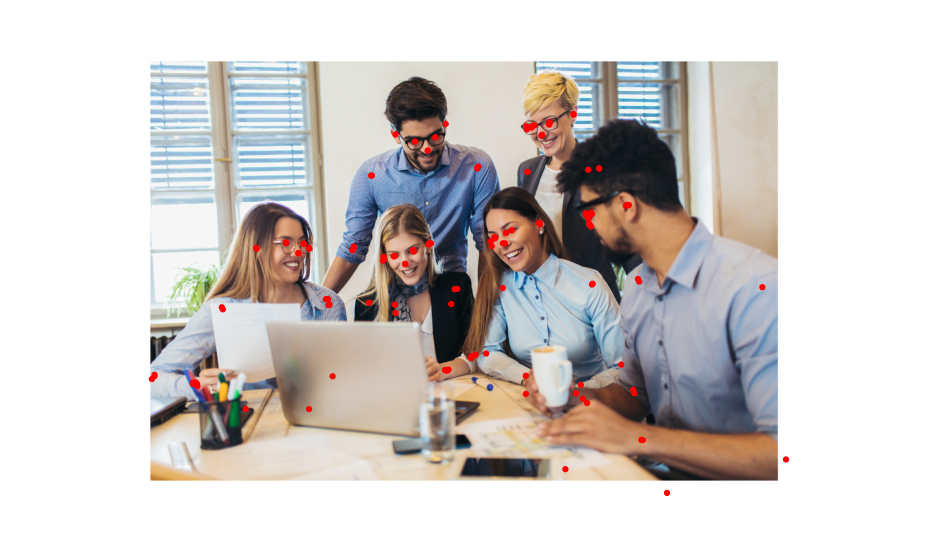

In [ ]:
# Load the model
model = load_pose_model()

# Specify the path to your image
image_path = 'test.png'

# Estimate pose
keypoints, keypoints_scores = estimate_pose(image_path, model)

# Display the results
display_pose_estimation(image_path, keypoints, keypoints_scores)

# Module 5

In [ ]:
!pip install dvc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 451.6/451.6 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.0/426.0 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 979.1/979.1 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.6/71.6 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.6/46.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [ ]:
# Initialize DVC
!git init
!dvc init

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/
Initialized DVC repository.

You can now commit the changes to git.

+---------------------------------------------------------------------+
|                                                                     |
|        DVC has enabled anonymous aggregate usage analytics.         |
|     Read the analytics documentation (and how to opt-out) here:     |
|             <https://dvc.org/doc/user-guide/analytics>              |
|                                  

In [ ]:
import torch
import torchvision
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import random_split, DataLoader
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import numpy as np
import os

In [ ]:
# FashionMNIST class names
classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
           "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


In [ ]:
# Define a function to show images
def imshow(img):
    # Convert the tensor image to numpy for displaying
    img = img.numpy()
    # The images are in Channel x Height x Width format. Convert them to Height x Width x Channel format.
    plt.imshow(np.transpose(img, (1, 2, 0)))
    plt.show()

In [ ]:
# Download and prepare the FashionMNIST dataset
fashion_mnist_training = datasets.FashionMNIST(
    root="data/FashionMNIST",
    train=True,
    download=True,
    transform=ToTensor(),
)

fashion_mnist_test = datasets.FashionMNIST(
    root="data/FashionMNIST",
    train=False,
    download=True,
    transform=ToTensor(),
)

100%|██████████| 26421880/26421880 [00:01<00:00, 13304032.93it/s]


Extracting data/FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 267172.44it/s]


Extracting data/FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 4948079.93it/s]


Extracting data/FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 9367582.21it/s]

Extracting data/FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/FashionMNIST/raw



In [ ]:
def split_dataset(dataset, train_ratio=0.8):
    train_size = int(train_ratio * len(dataset))
    validation_size = len(dataset) - train_size
    return random_split(dataset, [train_size, validation_size])

In [ ]:
# Create two different versions of the dataset splits

# Version 1 splits
train_dataset_v1, validation_dataset_v1 = split_dataset(fashion_mnist_training, train_ratio=0.8)
test_dataset_v1 = fashion_mnist_test

# Version 2 splits (different train/validation ratio for demonstration)
train_dataset_v2, validation_dataset_v2 = split_dataset(fashion_mnist_training, train_ratio=0.7)
test_dataset_v2 = fashion_mnist_test

In [ ]:
# Save the splits
os.makedirs('data/version1', exist_ok=True)
torch.save(train_dataset_v1, 'data/version1/train.pt')
torch.save(validation_dataset_v1, 'data/version1/validation.pt')
torch.save(test_dataset_v1, 'data/version1/test.pt')

os.makedirs('data/version2', exist_ok=True)
torch.save(train_dataset_v2, 'data/version2/train.pt')
torch.save(validation_dataset_v2, 'data/version2/validation.pt')
torch.save(test_dataset_v2, 'data/version2/test.pt')

In [ ]:
# Add the datasets to DVC
!dvc add data/version1
!dvc add data/version2

⠋ Checking graph
Adding...:   0% 0/1 [00:00<?, ?file/s{'info': ''}]
!
          |0.00 [00:00,     ?file/s]
                                    
!
  0% |          |0/? [00:00<?,    ?files/s]
                                           
Checking out /content/data/version1:   0% 0/4 [00:00<?, ?files/s]
Checking out /content/data/version1:   0% 0/4 [00:00<?, ?files/s{'info': ''}]
Adding...: 100% 1/1 [00:00<00:00,  7.73file/s{'info': ''}]

To track the changes with git, run:

	git add data/version1.dvc

To enable auto staging, run:

	dvc config core.autostage true
⠋ Checking graph
Adding...:   0% 0/1 [00:00<?, ?file/s{'info': ''}]
!
          |0.00 [00:00,     ?file/s]
          |3.00 [00:00,  15.9file/s]
                                    
!
  0% |          |0/? [00:00<?,    ?files/s]
                                           
Adding data/version2 to cache:   0% 0/2 [00:00<?, ?file/s]
Adding data/version2 to cache:   0% 0/2 [00:00<?, ?file/s{'info': ''}]
                                  

In [ ]:
# Commit the changes
!git add data/.gitignore data/version1.dvc data/version2.dvc
!git commit -m "Add FashionMNIST dataset versions to DVC"

Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@b67da2d26445.(none)')


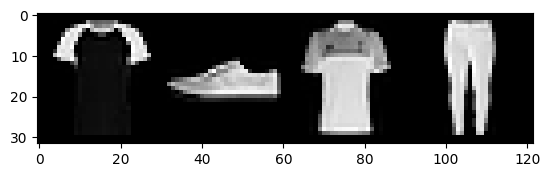

Labels:  T-shirt/top Sneaker T-shirt/top Trouser


In [ ]:
# Show images from the training set of version 1
train_loader_v1 = DataLoader(train_dataset_v1, batch_size=4, shuffle=True)
images, labels = next(iter(train_loader_v1))

# Show images
imshow(torchvision.utils.make_grid(images))

# Print labels
print('Labels: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

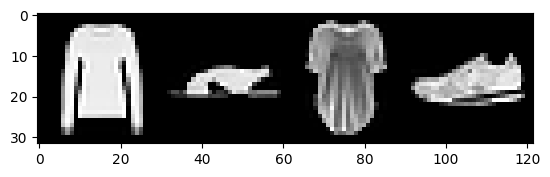

Labels:  Pullover Sandal T-shirt/top Sneaker


In [ ]:
# Show images from the training set of version 2
train_loader_v2 = DataLoader(train_dataset_v2, batch_size=4, shuffle=True)
images, labels = next(iter(train_loader_v2))

# Show images
imshow(torchvision.utils.make_grid(images))

# Print labels
print('Labels: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
# Optional: Configure and push to remote storage
!dvc remote add -d myremote s3://mybucket/path
!dvc push

## Weights and Biases

In [ ]:
! pip install wandb

In [ ]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import wandb

# Initialize W&B
wandb.init(project="fashion-mnist")

# Assuming CPU usage
device = "cpu"

# Check for CUDA GPU availability
if torch.cuda.is_available():
    device = "cuda"
# If CUDA is not available, check for MPS availability (Apple silicon)
elif torch.backends.mps.is_available():
    device = "mps"

print(f"Using {device} device")

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_size, 784),
            nn.ReLU(),
            nn.Linear(784, 784),
            nn.ReLU(),
            nn.Linear(784, num_classes)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [ ]:
from torch import optim

# Initialize the neural network
model_fashion = NeuralNetwork(28*28, 10).to(device)

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_fashion.parameters())

In [ ]:
# Training function
def train(dataloader, model, loss_fn, optimizer, epoch):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            # Log training metrics to W&B
            wandb.log({"epoch": epoch, "batch_loss": loss, "batch": batch})



In [ ]:
# Validation function
def validate(dataloader, model, loss_fn, epoch):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    validation_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            validation_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    validation_loss /= num_batches
    correct /= size
    print(f"Validation Error: Accuracy: {(100*correct):>0.1f}%, Avg loss: {validation_loss:>8f} \n")
    # Log validation metrics to W&B
    wandb.log({"epoch": epoch, "validation_loss": validation_loss, "validation_accuracy": correct})


In [ ]:
# Training loop
epochs = 5
for epoch in range(epochs):
    print(f"Epoch {epoch+1}\n-------------------------------")
    train(train_loader, model_fashion, loss_fn, optimizer, epoch)
    validate(validation_loader, model_fashion, loss_fn, epoch)
print("Training done!")

In [ ]:
# Test the model
def test(dataloader, model):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    # Log test metrics to W&B
    wandb.log({"test_loss": test_loss, "test_accuracy": correct})


In [ ]:
test(test_loader, model_fashion)